In [40]:
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [41]:
mailData = list()
mailLabel = list()
mailHeader = list()

with open('emails.csv', 'r') as archivo_csv:
    
    lector_csv = csv.reader(archivo_csv)
    
    for linea in lector_csv:
        # Procesar cada línea aquí
        mailData.append(linea)  # Ejemplo: Imprimir la línea en la consola

    mailHeader = mailData[0]
    del mailData[0]

for i in range(len(mailData)):
    for j in range(len(mailData[i])):
        
        if j != (len(mailData[i])-1):
            try:
                mailData[i][j] = int(mailData[i][j])
            except:
                pass
        else:
            mailLabel.append(mailData[i][j])
            del mailData[i][j]
            del mailData[i][0]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(mailData, mailLabel, test_size=0.3, random_state=0,shuffle=True)

In [51]:
def validacionCruzada(X_train,y_train, pliegues  = 3):
   kf = KFold(n_splits=pliegues)

   X_trainVC_out = list()
   X_val_out = list()
   y_trainVC_out = list()
   y_val_out = list()

   for train_index, val_index in kf.split(X_train):
    # Obtener los conjuntos de entrenamiento y validación para esta iteración
    X_trainVC, X_val = [X_train[i] for i in train_index], [X_train[i] for i in val_index]
    # Hacer lo que sea necesario con los conjuntos de entrenamiento y validación para esta iteración
    X_trainVC_out.append(X_trainVC)
    X_val_out.append(X_val)


   for train_index, val_index in kf.split(X_train):
    y_trainVC, y_val = [y_train[i] for i in train_index], [y_train[i] for i in val_index]   
    # Hacer lo que sea necesario con los conjuntos de entrenamiento y validación para esta iteración
    y_trainVC_out.append(y_trainVC)
    y_val_out.append(y_val)

    
   return X_trainVC_out, X_val_out, y_trainVC_out,y_val_out

In [52]:
X_trainVC, X_val, y_trainVC,y_val = validacionCruzada(X_train,y_train)

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

acc = np.array([])

# Iterar sobre los pliegues de validación
for fold in range(3):
    # Obtener los datos del pliegue actual
    X_train = X_trainVC[fold]
    X_val_clf = X_val[fold]
    y_train = y_trainVC[fold]
    y_val_clf= y_val[fold]

    # Crear una instancia del clasificador Naive Bayes
    clf = GaussianNB()

    # Entrenar el clasificador
    clf.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de validación
    y_pred = clf.predict(X_val_clf)

    # Calcular el accuracy del pliegue actual
    accuracy = accuracy_score(y_val_clf, y_pred)

    # Imprimir el accuracy del pliegue actual
    print("Accuracy del pliegue", fold+1, ":", accuracy)

    acc = np.append(acc, accuracy)

print(f'El promedio del accuracy de los 3 pliegues es {acc.mean()}')


Accuracy del pliegue 1 : 0.947804473902237
Accuracy del pliegue 2 : 0.9428334714167357
Accuracy del pliegue 3 : 0.9494195688225538
El promedio del accuracy de los 3 pliegues es 0.9466858380471755


In [54]:
X_train, X_test, y_train, y_test = train_test_split(mailData, mailLabel, test_size=0.3, random_state=0)
X_trainVC, X_val, y_trainVC,y_val = validacionCruzada(X_train,y_train)

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Crear el clasificador Naive Bayes con distribución multinomial
clf = MultinomialNB()

acc = np.array([])

# Iterar sobre los pliegues de validación
for fold in range(3):
    # Obtener los datos del pliegue actual
    X_train = X_trainVC[fold]
    X_val_clf = X_val[fold]
    y_train = y_trainVC[fold]
    y_val_clf= y_val[fold]


    # Entrenar el clasificador
    clf.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de validación
    y_pred = clf.predict(X_val_clf)

    # Calcular el accuracy del pliegue actual
    accuracy = accuracy_score(y_val_clf, y_pred)

    # Imprimir el accuracy del pliegue actual
    print("Accuracy del pliegue", fold+1, ":", accuracy)

    acc = np.append(acc, accuracy)

print(f'El promedio del accuracy de los 3 pliegues es {acc.mean()}')


Accuracy del pliegue 1 : 0.9453189726594863
Accuracy del pliegue 2 : 0.9378624689312345
Accuracy del pliegue 3 : 0.9469320066334992
El promedio del accuracy de los 3 pliegues es 0.9433711494080734


In [56]:
X_train, X_test, y_train, y_test = train_test_split(mailData, mailLabel, test_size=0.3, random_state=0)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1111
           1       0.88      0.95      0.91       441

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552



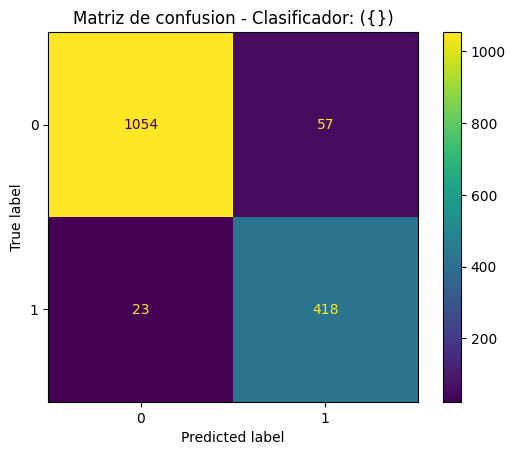

In [57]:
# Crear una instancia del clasificador Naive Bayes
clf = GaussianNB()

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = clf.predict(X_test)

# Calcular y mostrar el reporte de clasificación
reporte = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(reporte)

# Calcular y mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)


matriz_display = ConfusionMatrixDisplay(matriz_confusion)
matriz_display.plot()
plt.title("Matriz de confusion - Clasificador: ({})")
plt.show()